In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.metrics import classification_report

In [6]:
df=pd.read_csv('suv.csv')

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.shape

(400, 5)

In [9]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
df.drop('User ID',inplace=True,axis=1)

In [14]:
s=df['Age']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [15]:
len(outliers)

0

In [16]:
s=df['EstimatedSalary']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [17]:
len(outliers1)

0

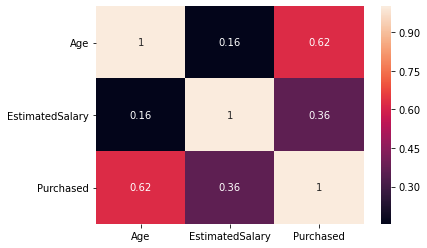

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
le=LabelEncoder()

In [20]:
df['Gender']=le.fit_transform(df['Gender'])

In [21]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [22]:
X=df.drop('Purchased',axis=1)
Y=df['Purchased']

In [23]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [24]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
ss=StandardScaler()

In [27]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [28]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1,input_shape=(X.shape[1],),activation='sigmoid')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [31]:
trained_model=model.fit(X_train_ss,Y_train,epochs=50)

Epoch 1/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7617
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.7452
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.7295
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.7143
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6997
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6861
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6730
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6605
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6485
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6373
Epoch 11/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6265
Epoch 12/50
9/9 [==============================] - 0s 4ms/step - loss: 0.6161
Epoch 13/50
9/9 [==============================] - 0s 4ms/step - loss: 0.

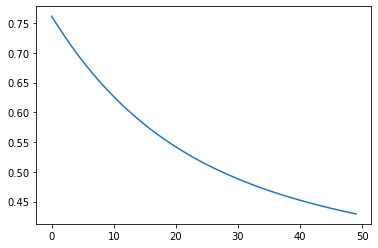

In [32]:
plt.plot(trained_model.history['loss'])

In [33]:
Y_pred=model.predict(X_test_ss)

In [34]:
Y_pred = np.where(Y_pred >= 0.5,1,0)

In [35]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        72
           1       0.83      0.79      0.81        48

    accuracy                           0.85       120
   macro avg       0.85      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120

